In [5]:
import pandas as pd

In [7]:
df = pd.read_csv('train.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [21]:
df1 = df.copy()

# 1. Convertendo a coluna Age de texto para número
linhasSelecionadas = (df1['Delivery_person_Age'] != 'NaN ')
df1 = df1.loc[linhasSelecionadas, :].copy()

linhasSelecionadas = (df1['Weatherconditions'] != 'conditions NaN')
df1 = df1.loc[linhasSelecionadas, :].copy()

linhasSelecionadas = (df1['Festival'] != 'NaN ')
df1 = df1.loc[linhasSelecionadas, :].copy()

df1['Delivery_person_Age'] = df1['Delivery_person_Age'].astype(int)

# 2. convertendo a coluna Rating de texto para numero decimal (float)
df1['Delivery_person_Ratings'] = df1['Delivery_person_Ratings'].astype(float)

# 3. convertendo a coluna order_date de texto para data
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'], format='%d-%m-%Y')

# 4. convertendo multiple_deliveries de texto para numero inteiro (int)
linhasSelecionadas = (df1['multiple_deliveries'] != 'NaN ')
df1 = df1.loc[linhasSelecionadas, :].copy()
df1['multiple_deliveries'] = df1['multiple_deliveries'].astype(int)

## 5. Removendo os espaços dentro de strings/texto/object
df1.loc[:, 'ID'] = df1.loc[:, 'ID'].str.strip()
df1.loc[:, 'Delivery_person_ID'] = df1.loc[:, 'Delivery_person_ID'].str.strip()
df1.loc[:, 'Road_traffic_density'] = df1.loc[:, 'Road_traffic_density'].str.strip()
df1.loc[:, 'Type_of_order'] = df1.loc[:, 'Type_of_order'].str.strip()
df1.loc[:, 'Type_of_vehicle'] = df1.loc[:, 'Type_of_vehicle'].str.strip()
df1.loc[:, 'City'] = df1.loc[:, 'City'].str.strip()

# 6. Removendo valores nulos
df1 = df1.loc[df1['Road_traffic_density'] != 'NaN', :]
df1 = df1.loc[df1['City'] != 'NaN', :]

df1 = df1.reset_index(drop=True)

# 1. Desenhar um gráfico de pizza com a média de idade dos entregadores por cidade

(0.0, 40.0)

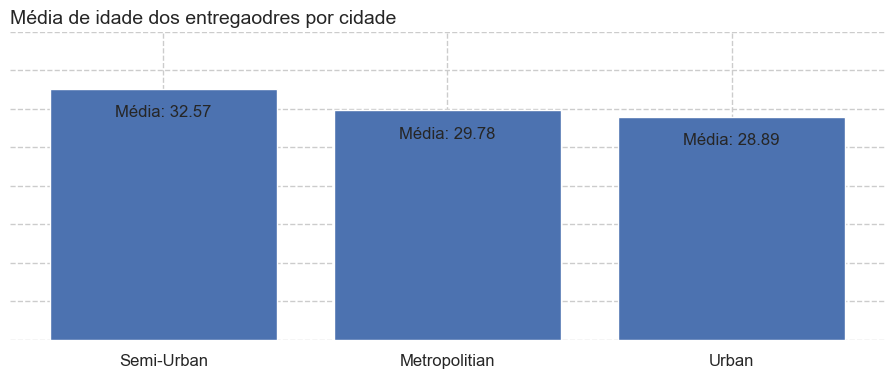

In [9]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white')

df_ax = df1.loc[:, ['City', 'Delivery_person_Age']].groupby('City').mean().reset_index().sort_values('Delivery_person_Age', ascending=False)

fig, ax = plt.subplots(figsize=(10, 4))
fig.subplots_adjust(right=1)
ax.set_title('Média de idade dos entregaodres por cidade', loc='left', fontsize=14)

ax.bar(df_ax['City'], df_ax['Delivery_person_Age'])
sns.despine(left=True, bottom=True)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.grid(linestyle='--')

ax.set_yticklabels([])
for i, v in enumerate(df_ax['Delivery_person_Age']):
    qtd = f'Média: {v:,.2f}'
    offset = -3
    ax.text(i, v+offset, qtd, fontsize=12, ha='center', va='center')

ymin = 0
ymax = 40
ax.set_ylim(ymin, ymax)

In [36]:
# Absoluto
df_aux = df1.copy()
df_aux = df_aux.loc[:, ['Weatherconditions', 'Festival']]
df_aux = pd.crosstab(index=df_aux.Weatherconditions, columns=df_aux.Festival).sort_values('No ')
df_aux

Festival,No,Yes
Weatherconditions,,
conditions Sunny,6551,74
conditions Cloudy,6730,231
conditions Windy,6757,93
conditions Sandstorms,6772,86
conditions Fog,6876,245
conditions Stormy,6900,104


In [38]:
# Normalizado
df_aux_norm = df1.copy()
df_aux_norm = df_aux_norm.loc[:, ['Weatherconditions', 'Festival']]
df_aux_norm = pd.crosstab(index=df_aux_norm.Weatherconditions, columns=df_aux_norm.Festival, normalize='index')
df_aux_norm

Festival,No,Yes
Weatherconditions,,
conditions Cloudy,0.966815,0.033185
conditions Fog,0.965595,0.034405
conditions Sandstorms,0.987460,0.012540
conditions Stormy,0.985151,0.014849
conditions Sunny,0.988830,0.011170
conditions Windy,0.986423,0.013577


In [39]:
# Função para escrita de texto utilizando diferentes cores. Não existe uma
# função nativa para isso. (Adaptado de https://github.com/empathy87/storytelling-with-data)
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

In [40]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_17324\2857914519.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


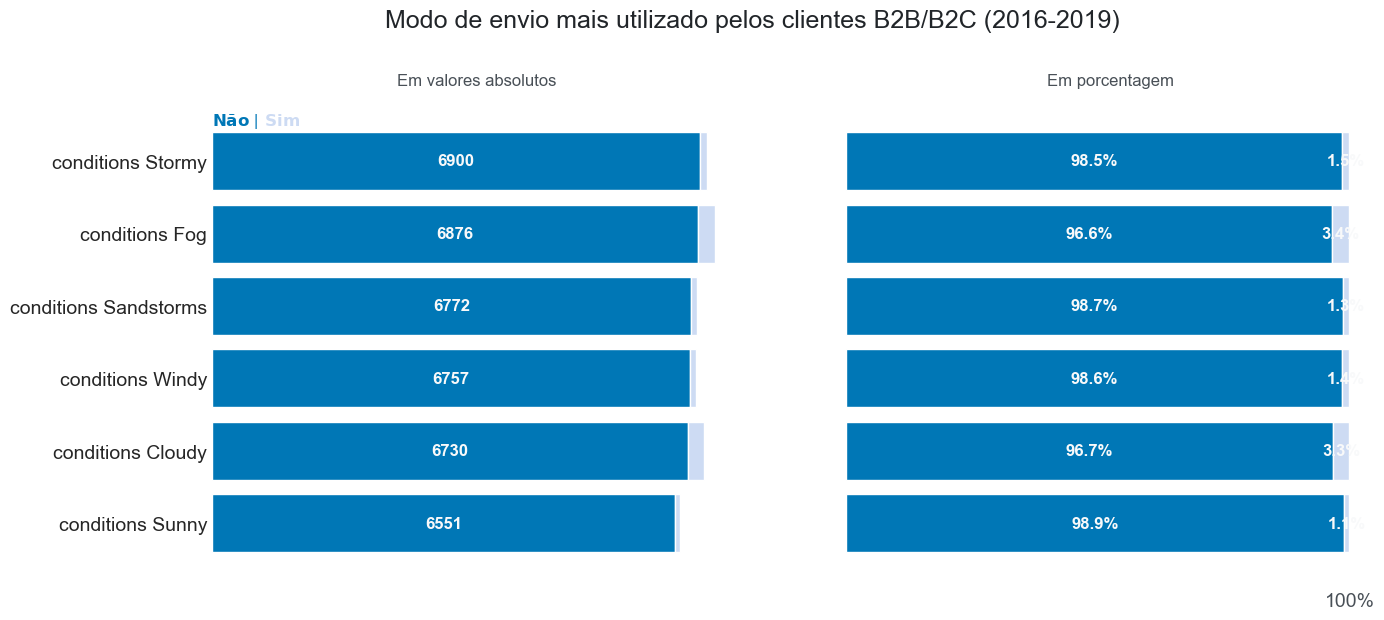

In [55]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando a biblioteca 
import matplotlib.pyplot as plt

# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Definindo as cores do gráfico
cores = [AZUL2, AZUL5]

# GRÁFICO 1 - Barras Empilhadas
axs[0].barh(df_aux.index, df_aux['No '], color=cores[0])
axs[0].barh(df_aux.index, df_aux['Yes '], left=df_aux['No '], color=cores[1])

axs[0].set_title('Em valores absolutos\n', color = CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[0].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 5.5, '$\\bf{Não}$ | || $\\bf{Sim}$', cores = [cores], ax=axs[0], fontsize=12) # legenda

#######################################

# GRÁFICO 2 - Barras empilhadas 100 %
axs[1].barh(df_aux_norm.index, df_aux_norm['No '], color=cores[0])
axs[1].barh(df_aux_norm.index, df_aux_norm['Yes '], left=df_aux_norm['No '], color=cores[1])

axs[1].set_title('Em porcentagem\n', color = CINZA2)
axs[1].set_xlabel('100%', color = CINZA2, size = 14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)

#######################################

# Título dos gráficos
fig.suptitle("Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n",
             fontsize=18, color=CINZA1, ha = 'right', x = 0.73, y = 1.05)

# Valores das barras
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig.show()